# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

### Explore Data

In [3]:
loan_data_inputs_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_INCOME_TYPE:Maternity_leave_Unemployed_Working,NAME_INCOME_TYPE:Maternity_leave_Unemployed,OCCUPATION_TYPE:Security_staff_Cooking_staff,OCCUPATION_TYPE:Laborers_Sales_staff,OCCUPATION_TYPE:Realty_agents_IT_staff,OCCUPATION_TYPE:Private_service_staff_Medicine_staff,OCCUPATION_TYPE:Core_staff_Managers,ORGANIZATION_TYPE:Realtor_Cleaning_Mobile_Industry_type 4,ORGANIZATION_TYPE:Industry_type 3_Agriculture,ORGANIZATION_TYPE:Security_Trade_type_7_Transport_type_4
123473,243191,Cash loans,F,Y,N,0,171000.0,555273.0,16366.5,463500.0,...,0,0,0,0,0,0,0,0,0,0
10118,111778,Cash loans,M,N,Y,1,157500.0,198085.5,23638.5,171000.0,...,1,0,0,1,0,0,0,0,0,0
64716,175057,Cash loans,M,Y,Y,0,135000.0,776304.0,25173.0,648000.0,...,1,0,0,0,0,0,0,0,0,0
234940,372147,Cash loans,M,Y,Y,1,164133.0,900000.0,36787.5,900000.0,...,0,0,0,0,0,0,0,0,0,0
236051,373412,Cash loans,M,N,Y,0,225000.0,533668.5,21294.0,477000.0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,TARGET
123473,1
10118,1
64716,0
234940,1
236051,1


In [5]:
loan_data_inputs_train.shape

(246008, 263)

In [6]:
loan_data_targets_train.shape

(246008, 1)

In [7]:
loan_data_inputs_test.shape

(61503, 262)

In [8]:
loan_data_targets_test.shape

(61503, 1)

### Selecting the Features

In [10]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['NAME_CONTRACT_TYPE:Cash loans',
'NAME_CONTRACT_TYPE:Revolving loans',
'NAME_INCOME_TYPE:Maternity_leave_Unemployed',
'NAME_INCOME_TYPE:Working',
'NAME_INCOME_TYPE:Commercial associate',
'NAME_INCOME_TYPE:State servant',
'NAME_INCOME_TYPE:Pensioner',
'NAME_EDUCATION_TYPE:Lower secondary',
'NAME_EDUCATION_TYPE:Secondary / secondary special',
'NAME_EDUCATION_TYPE:Incomplete higher',
'NAME_EDUCATION_TYPE:Higher education',
'NAME_EDUCATION_TYPE:Academic degree',
'NAME_FAMILY_STATUS:not married',
'NAME_FAMILY_STATUS:Married',
'NAME_FAMILY_STATUS:divorced',
'NAME_HOUSING_TYPE:Rented apartment',
'NAME_HOUSING_TYPE:Municipal apartment',
'NAME_HOUSING_TYPE:Co-op apartment',
'NAME_HOUSING_TYPE:House / apartment',
'NAME_HOUSING_TYPE:Office apartment',
'OCCUPATION_TYPE:Low-skill Laborers',
'OCCUPATION_TYPE:Waiters/barmen staff',
'OCCUPATION_TYPE:Drivers',
'OCCUPATION_TYPE:Security_staff_Cooking_staff',
'OCCUPATION_TYPE:Laborers_Sales_staff',
'OCCUPATION_TYPE:Cleaning staff',
'OCCUPATION_TYPE:Realty_agents_IT_staff',
'OCCUPATION_TYPE:Private_service_staff_Medicine_staff',
'OCCUPATION_TYPE:Other Occupation Type',
'OCCUPATION_TYPE:Secretaries',
'OCCUPATION_TYPE:Core_staff_Managers',
'OCCUPATION_TYPE:High skill tech staff',
'OCCUPATION_TYPE:HR staff',
'OCCUPATION_TYPE:Accountants',
'REGION_RATING_CLIENT:3',
'REGION_RATING_CLIENT:2',
'REGION_RATING_CLIENT:1',
'DEF_30_CNT_SOCIAL_CIRCLE:3.0',
'DEF_30_CNT_SOCIAL_CIRCLE:4.0',
'DEF_30_CNT_SOCIAL_CIRCLE:5.0',
'DEF_30_CNT_SOCIAL_CIRCLE:2.0',
'DEF_30_CNT_SOCIAL_CIRCLE:1.0',
'DEF_30_CNT_SOCIAL_CIRCLE:0.0',
'CNT_CHILDREN:6',
'CNT_CHILDREN:4',
'CNT_CHILDREN:3',
'CNT_CHILDREN:1',
'CNT_CHILDREN:2',
'CNT_CHILDREN:0',
'CNT_CHILDREN:5',
'HOUSETYPE_MODE:specific housing',
'HOUSETYPE_MODE:terraced house',
'HOUSETYPE_MODE:block of flats',
'CODE_GENDER:M',
'CODE_GENDER:F',
'ORGANIZATION_TYPE:Transport type 3',
'ORGANIZATION_TYPE:Restaurant',
'ORGANIZATION_TYPE:Industry type 1',
'ORGANIZATION_TYPE:Construction',
'ORGANIZATION_TYPE:Realtor_Cleaning_Mobile_Industry_type 4',
'ORGANIZATION_TYPE:Industry_type 3_Agriculture',
'ORGANIZATION_TYPE:Self-employed',
'ORGANIZATION_TYPE:Trade type 3',
'ORGANIZATION_TYPE:Trade type 1',
'ORGANIZATION_TYPE:Security_Trade_type_7_Transport_type_4',
'ORGANIZATION_TYPE:Business Entity Type 3',
'ORGANIZATION_TYPE:Postal',
'ORGANIZATION_TYPE:Industry type 11',
'ORGANIZATION_TYPE:Business Entity Type 2',
'ORGANIZATION_TYPE:Advertising',
'ORGANIZATION_TYPE:Business Entity Type 1',
'ORGANIZATION_TYPE:Industry type 2',
'ORGANIZATION_TYPE:Industry type 7',
'ORGANIZATION_TYPE:Housing',
'ORGANIZATION_TYPE:Transport type 2',
'ORGANIZATION_TYPE:Telecom']]

In [11]:
ref_categories = ['NAME_CONTRACT_TYPE:Revolving loans',
'NAME_INCOME_TYPE:Maternity_leave_Unemployed',
'NAME_EDUCATION_TYPE:Lower secondary',
'NAME_FAMILY_STATUS:divorced',
'NAME_HOUSING_TYPE:Rented apartment',
'OCCUPATION_TYPE:Private_service_staff_Medicine_staff',
'REGION_RATING_CLIENT:3',
'DEF_30_CNT_SOCIAL_CIRCLE:3.0',
'CNT_CHILDREN:6',
'HOUSETYPE_MODE:terraced house',
'CODE_GENDER:M',
'ORGANIZATION_TYPE:Transport type 3']

In [12]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,NAME_CONTRACT_TYPE:Cash loans,NAME_INCOME_TYPE:Working,NAME_INCOME_TYPE:Commercial associate,NAME_INCOME_TYPE:State servant,NAME_INCOME_TYPE:Pensioner,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Academic degree,NAME_FAMILY_STATUS:not married,...,ORGANIZATION_TYPE:Postal,ORGANIZATION_TYPE:Industry type 11,ORGANIZATION_TYPE:Business Entity Type 2,ORGANIZATION_TYPE:Advertising,ORGANIZATION_TYPE:Business Entity Type 1,ORGANIZATION_TYPE:Industry type 2,ORGANIZATION_TYPE:Industry type 7,ORGANIZATION_TYPE:Housing,ORGANIZATION_TYPE:Transport type 2,ORGANIZATION_TYPE:Telecom
123473,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10118,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
64716,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234940,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236051,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [14]:
reg = LogisticRegression(max_iter=215)

In [15]:
pd.options.display.max_rows = None

In [16]:
reg.fit(inputs_train, loan_data_targets_train)

c:\Users\Azam Fathurrahman\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Azam Fathurrahman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=215)

In [17]:
reg.intercept_

array([0.42027467])

In [18]:
reg.coef_

array([[-0.44889448,  0.40617051,  0.5249833 ,  0.58207835,  0.73482484,
         0.1977623 ,  0.2413058 ,  0.5790402 ,  1.13500843, -0.21209748,
         0.07278225,  0.12199033,  0.20471859,  0.24326876,  0.42698383,
        -0.50596819, -0.31038555, -0.11278411, -0.20501531, -0.1458273 ,
        -0.23443169, -0.10961999, -0.04697974, -0.02895564,  0.06489839,
         0.17015993, -0.01011149,  0.26118757,  0.38402693,  0.76409937,
         0.07022687,  0.00838969,  0.09539292,  0.29392158,  0.56681568,
         0.13540502,  0.33496325,  0.39292049,  0.43703494,  0.5071352 ,
         0.68840872,  0.01270255,  0.20287318,  0.28153478, -0.46803786,
        -0.3874822 , -0.38758919, -0.44920452, -0.24764222, -0.28325702,
        -0.42704897, -0.38797425, -0.19658037, -0.25330005, -0.31850494,
        -0.13413802, -0.14119105, -0.32917151, -0.14466723, -0.0434896 ,
        -0.02857475,  0.03765763,  0.09704042, -0.10057913]])

In [19]:
feature_name = inputs_train.columns.values

In [20]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.420275
1,NAME_CONTRACT_TYPE:Cash loans,-0.448894
2,NAME_INCOME_TYPE:Working,0.406171
3,NAME_INCOME_TYPE:Commercial associate,0.524983
4,NAME_INCOME_TYPE:State servant,0.582078
5,NAME_INCOME_TYPE:Pensioner,0.734825
6,NAME_EDUCATION_TYPE:Secondary / secondary special,0.197762
7,NAME_EDUCATION_TYPE:Incomplete higher,0.241306
8,NAME_EDUCATION_TYPE:Higher education,0.579040
9,NAME_EDUCATION_TYPE:Academic degree,1.135008


## Build a Logistic Regression Model with P-Values

In [21]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [22]:
reg = LogisticRegression_with_p_values(max_iter=215)

In [23]:
reg.fit(inputs_train, loan_data_targets_train)

c:\Users\Azam Fathurrahman\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Azam Fathurrahman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.420275
1,NAME_CONTRACT_TYPE:Cash loans,-0.448894
2,NAME_INCOME_TYPE:Working,0.406171
3,NAME_INCOME_TYPE:Commercial associate,0.524983
4,NAME_INCOME_TYPE:State servant,0.582078
5,NAME_INCOME_TYPE:Pensioner,0.734825
6,NAME_EDUCATION_TYPE:Secondary / secondary special,0.197762
7,NAME_EDUCATION_TYPE:Incomplete higher,0.241306
8,NAME_EDUCATION_TYPE:Higher education,0.579040
9,NAME_EDUCATION_TYPE:Academic degree,1.135008


In [25]:
p_values = reg.p_values

In [26]:
p_values = np.append(np.nan, np.array(p_values))

In [27]:
summary_table['p_values'] = p_values

In [28]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.420275,NaN
1,NAME_CONTRACT_TYPE:Cash loans,-0.448894,2.296504e-50
2,NAME_INCOME_TYPE:Working,0.406171,2.552438e-01
3,NAME_INCOME_TYPE:Commercial associate,0.524983,1.417653e-01
4,NAME_INCOME_TYPE:State servant,0.582078,1.042056e-01
5,NAME_INCOME_TYPE:Pensioner,0.734825,4.006774e-02
6,NAME_EDUCATION_TYPE:Secondary / secondary special,0.197762,8.290659e-04
7,NAME_EDUCATION_TYPE:Incomplete higher,0.241306,6.992775e-04
8,NAME_EDUCATION_TYPE:Higher education,0.579040,1.059350e-20
9,NAME_EDUCATION_TYPE:Academic degree,1.135008,2.372495e-02


In [29]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['NAME_CONTRACT_TYPE:Cash loans',
'NAME_CONTRACT_TYPE:Revolving loans',
'NAME_EDUCATION_TYPE:Lower secondary',
'NAME_EDUCATION_TYPE:Secondary / secondary special',
'NAME_EDUCATION_TYPE:Incomplete higher',
'NAME_EDUCATION_TYPE:Higher education',
'NAME_EDUCATION_TYPE:Academic degree',
'NAME_FAMILY_STATUS:not married',
'NAME_FAMILY_STATUS:Married',
'NAME_FAMILY_STATUS:divorced',
'NAME_HOUSING_TYPE:Rented apartment',
'NAME_HOUSING_TYPE:Municipal apartment',
'NAME_HOUSING_TYPE:Co-op apartment',
'NAME_HOUSING_TYPE:House / apartment',
'NAME_HOUSING_TYPE:Office apartment',
'OCCUPATION_TYPE:Low-skill Laborers',
'OCCUPATION_TYPE:Waiters/barmen staff',
'OCCUPATION_TYPE:Drivers',
'OCCUPATION_TYPE:Security_staff_Cooking_staff',
'OCCUPATION_TYPE:Laborers_Sales_staff',
'OCCUPATION_TYPE:Cleaning staff',
'OCCUPATION_TYPE:Realty_agents_IT_staff',
'OCCUPATION_TYPE:Private_service_staff_Medicine_staff',
'OCCUPATION_TYPE:Other Occupation Type',
'OCCUPATION_TYPE:Secretaries',
'OCCUPATION_TYPE:Core_staff_Managers',
'OCCUPATION_TYPE:High skill tech staff',
'OCCUPATION_TYPE:HR staff',
'OCCUPATION_TYPE:Accountants',
'REGION_RATING_CLIENT:3',
'REGION_RATING_CLIENT:2',
'REGION_RATING_CLIENT:1',
'DEF_30_CNT_SOCIAL_CIRCLE:3.0',
'DEF_30_CNT_SOCIAL_CIRCLE:4.0',
'DEF_30_CNT_SOCIAL_CIRCLE:5.0',
'DEF_30_CNT_SOCIAL_CIRCLE:2.0',
'DEF_30_CNT_SOCIAL_CIRCLE:1.0',
'DEF_30_CNT_SOCIAL_CIRCLE:0.0',
'HOUSETYPE_MODE:specific housing',
'HOUSETYPE_MODE:terraced house',
'HOUSETYPE_MODE:block of flats',
'CODE_GENDER:M',
'CODE_GENDER:F',
'ORGANIZATION_TYPE:Transport type 3',
'ORGANIZATION_TYPE:Restaurant',
'ORGANIZATION_TYPE:Industry type 1',
'ORGANIZATION_TYPE:Construction',
'ORGANIZATION_TYPE:Realtor_Cleaning_Mobile_Industry_type 4',
'ORGANIZATION_TYPE:Industry_type 3_Agriculture',
'ORGANIZATION_TYPE:Self-employed',
'ORGANIZATION_TYPE:Trade type 3',
'ORGANIZATION_TYPE:Trade type 1',
'ORGANIZATION_TYPE:Security_Trade_type_7_Transport_type_4',
'ORGANIZATION_TYPE:Business Entity Type 3',
'ORGANIZATION_TYPE:Postal',
'ORGANIZATION_TYPE:Industry type 11',
'ORGANIZATION_TYPE:Business Entity Type 2',
'ORGANIZATION_TYPE:Advertising',
'ORGANIZATION_TYPE:Business Entity Type 1',
'ORGANIZATION_TYPE:Industry type 2',
'ORGANIZATION_TYPE:Industry type 7',
'ORGANIZATION_TYPE:Housing',
'ORGANIZATION_TYPE:Transport type 2',
'ORGANIZATION_TYPE:Telecom']]

In [30]:
ref_categories = ['NAME_CONTRACT_TYPE:Revolving loans',
'NAME_EDUCATION_TYPE:Lower secondary',
'NAME_FAMILY_STATUS:divorced',
'NAME_HOUSING_TYPE:Rented apartment',
'OCCUPATION_TYPE:Private_service_staff_Medicine_staff',
'REGION_RATING_CLIENT:3',
'DEF_30_CNT_SOCIAL_CIRCLE:3.0',
'HOUSETYPE_MODE:terraced house',
'CODE_GENDER:M',
'ORGANIZATION_TYPE:Transport type 3']

In [31]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,NAME_CONTRACT_TYPE:Cash loans,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Academic degree,NAME_FAMILY_STATUS:not married,NAME_FAMILY_STATUS:Married,NAME_HOUSING_TYPE:Municipal apartment,NAME_HOUSING_TYPE:Co-op apartment,NAME_HOUSING_TYPE:House / apartment,...,ORGANIZATION_TYPE:Postal,ORGANIZATION_TYPE:Industry type 11,ORGANIZATION_TYPE:Business Entity Type 2,ORGANIZATION_TYPE:Advertising,ORGANIZATION_TYPE:Business Entity Type 1,ORGANIZATION_TYPE:Industry type 2,ORGANIZATION_TYPE:Industry type 7,ORGANIZATION_TYPE:Housing,ORGANIZATION_TYPE:Transport type 2,ORGANIZATION_TYPE:Telecom
123473,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10118,1,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
64716,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
234940,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
236051,1,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [32]:
reg2 = LogisticRegression_with_p_values(max_iter=215)
reg2.fit(inputs_train, loan_data_targets_train)

c:\Users\Azam Fathurrahman\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
feature_name = inputs_train.columns.values

In [34]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.381115
1,NAME_CONTRACT_TYPE:Cash loans,-0.435663
2,NAME_EDUCATION_TYPE:Secondary / secondary special,0.184132
3,NAME_EDUCATION_TYPE:Incomplete higher,0.215870
4,NAME_EDUCATION_TYPE:Higher education,0.557909
5,NAME_EDUCATION_TYPE:Academic degree,1.127356
6,NAME_FAMILY_STATUS:not married,-0.219179
7,NAME_FAMILY_STATUS:Married,0.043738
8,NAME_HOUSING_TYPE:Municipal apartment,0.130172
9,NAME_HOUSING_TYPE:Co-op apartment,0.206155


In [35]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.381115,NaN
1,NAME_CONTRACT_TYPE:Cash loans,-0.435663,8.625615e-49
2,NAME_EDUCATION_TYPE:Secondary / secondary special,0.184132,1.019639e-03
3,NAME_EDUCATION_TYPE:Incomplete higher,0.215870,1.626171e-03
4,NAME_EDUCATION_TYPE:Higher education,0.557909,3.152009e-21
5,NAME_EDUCATION_TYPE:Academic degree,1.127356,2.539165e-02
6,NAME_FAMILY_STATUS:not married,-0.219179,1.237997e-13
7,NAME_FAMILY_STATUS:Married,0.043738,8.121773e-02
8,NAME_HOUSING_TYPE:Municipal apartment,0.130172,3.558623e-02
9,NAME_HOUSING_TYPE:Co-op apartment,0.206155,1.167601e-01


# PD Model Validation (Test)

### Out-of-sample validation (test)

In [36]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['NAME_CONTRACT_TYPE:Cash loans',
'NAME_CONTRACT_TYPE:Revolving loans',
'NAME_EDUCATION_TYPE:Lower secondary',
'NAME_EDUCATION_TYPE:Secondary / secondary special',
'NAME_EDUCATION_TYPE:Incomplete higher',
'NAME_EDUCATION_TYPE:Higher education',
'NAME_EDUCATION_TYPE:Academic degree',
'NAME_FAMILY_STATUS:not married',
'NAME_FAMILY_STATUS:Married',
'NAME_FAMILY_STATUS:divorced',
'NAME_HOUSING_TYPE:Rented apartment',
'NAME_HOUSING_TYPE:Municipal apartment',
'NAME_HOUSING_TYPE:Co-op apartment',
'NAME_HOUSING_TYPE:House / apartment',
'NAME_HOUSING_TYPE:Office apartment',
'OCCUPATION_TYPE:Low-skill Laborers',
'OCCUPATION_TYPE:Waiters/barmen staff',
'OCCUPATION_TYPE:Drivers',
'OCCUPATION_TYPE:Security_staff_Cooking_staff',
'OCCUPATION_TYPE:Laborers_Sales_staff',
'OCCUPATION_TYPE:Cleaning staff',
'OCCUPATION_TYPE:Realty_agents_IT_staff',
'OCCUPATION_TYPE:Private_service_staff_Medicine_staff',
'OCCUPATION_TYPE:Other Occupation Type',
'OCCUPATION_TYPE:Secretaries',
'OCCUPATION_TYPE:Core_staff_Managers',
'OCCUPATION_TYPE:High skill tech staff',
'OCCUPATION_TYPE:HR staff',
'OCCUPATION_TYPE:Accountants',
'REGION_RATING_CLIENT:3',
'REGION_RATING_CLIENT:2',
'REGION_RATING_CLIENT:1',
'DEF_30_CNT_SOCIAL_CIRCLE:3.0',
'DEF_30_CNT_SOCIAL_CIRCLE:4.0',
'DEF_30_CNT_SOCIAL_CIRCLE:5.0',
'DEF_30_CNT_SOCIAL_CIRCLE:2.0',
'DEF_30_CNT_SOCIAL_CIRCLE:1.0',
'DEF_30_CNT_SOCIAL_CIRCLE:0.0',
'HOUSETYPE_MODE:specific housing',
'HOUSETYPE_MODE:terraced house',
'HOUSETYPE_MODE:block of flats',
'CODE_GENDER:M',
'CODE_GENDER:F',
'ORGANIZATION_TYPE:Transport type 3',
'ORGANIZATION_TYPE:Restaurant',
'ORGANIZATION_TYPE:Industry type 1',
'ORGANIZATION_TYPE:Construction',
'ORGANIZATION_TYPE:Realtor_Cleaning_Mobile_Industry_type 4',
'ORGANIZATION_TYPE:Industry_type 3_Agriculture',
'ORGANIZATION_TYPE:Self-employed',
'ORGANIZATION_TYPE:Trade type 3',
'ORGANIZATION_TYPE:Trade type 1',
'ORGANIZATION_TYPE:Security_Trade_type_7_Transport_type_4',
'ORGANIZATION_TYPE:Business Entity Type 3',
'ORGANIZATION_TYPE:Postal',
'ORGANIZATION_TYPE:Industry type 11',
'ORGANIZATION_TYPE:Business Entity Type 2',
'ORGANIZATION_TYPE:Advertising',
'ORGANIZATION_TYPE:Business Entity Type 1',
'ORGANIZATION_TYPE:Industry type 2',
'ORGANIZATION_TYPE:Industry type 7',
'ORGANIZATION_TYPE:Housing',
'ORGANIZATION_TYPE:Transport type 2',
'ORGANIZATION_TYPE:Telecom']]

In [37]:
ref_categories = ['NAME_CONTRACT_TYPE:Revolving loans',
'NAME_EDUCATION_TYPE:Lower secondary',
'NAME_FAMILY_STATUS:divorced',
'NAME_HOUSING_TYPE:Rented apartment',
'OCCUPATION_TYPE:Private_service_staff_Medicine_staff',
'REGION_RATING_CLIENT:3',
'DEF_30_CNT_SOCIAL_CIRCLE:3.0',
'HOUSETYPE_MODE:terraced house',
'CODE_GENDER:M',
'ORGANIZATION_TYPE:Transport type 3']

In [38]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,NAME_CONTRACT_TYPE:Cash loans,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Academic degree,NAME_FAMILY_STATUS:not married,NAME_FAMILY_STATUS:Married,NAME_HOUSING_TYPE:Municipal apartment,NAME_HOUSING_TYPE:Co-op apartment,NAME_HOUSING_TYPE:House / apartment,...,ORGANIZATION_TYPE:Postal,ORGANIZATION_TYPE:Industry type 11,ORGANIZATION_TYPE:Business Entity Type 2,ORGANIZATION_TYPE:Advertising,ORGANIZATION_TYPE:Business Entity Type 1,ORGANIZATION_TYPE:Industry type 2,ORGANIZATION_TYPE:Industry type 7,ORGANIZATION_TYPE:Housing,ORGANIZATION_TYPE:Transport type 2,ORGANIZATION_TYPE:Telecom
245895,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
98194,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
36463,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
249923,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
158389,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y_hat_test = reg2.model.predict(inputs_test)

In [40]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [42]:
y_hat_test_proba

array([[0.12634931, 0.87365069],
       [0.08730705, 0.91269295],
       [0.09988256, 0.90011744],
       ...,
       [0.06297552, 0.93702448],
       [0.12545892, 0.87454108],
       [0.07534377, 0.92465623]])

In [43]:
y_hat_test_proba[:][:,1]

array([0.87365069, 0.91269295, 0.90011744, ..., 0.93702448, 0.87454108,
       0.92465623])

In [44]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [45]:
y_hat_test_proba

array([0.87365069, 0.91269295, 0.90011744, ..., 0.93702448, 0.87454108,
       0.92465623])

In [46]:
loan_data_targets_test_temp = loan_data_targets_test

In [47]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [48]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [49]:
df_actual_predicted_probs.shape

(61503, 2)

In [50]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [51]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [52]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
245895,1,0.873651
98194,1,0.912693
36463,1,0.900117
249923,1,0.947931
158389,1,0.865811


### Accuracy and Area under the Curve

In [53]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [54]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,2058,2891
1,13617,42937


In [55]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.033462,0.047006
1,0.221404,0.698129


In [56]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.7315903289270442

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

In [58]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99979794, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.06093291e-04, 1.23775507e-04, ...,
        9.99982318e-01, 9.99982318e-01, 1.00000000e+00]),
 array([1.98785403, 0.98785403, 0.98708506, ..., 0.6492799 , 0.64449009,
        0.63644217]))

In [59]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

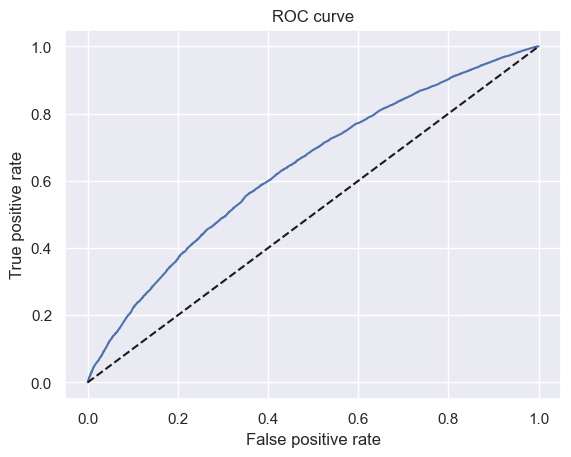

In [61]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [62]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6367450327391806

### Gini and Kolmogorov-Smirnov

In [63]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [64]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
302636,1,0.636442,0
202809,0,0.644490,0
101689,1,0.649280,0
202359,1,0.650240,0
275067,1,0.654116,0


In [65]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
102256,1,0.987854,1
143399,1,0.987854,1
84677,1,0.987854,1
52851,1,0.987854,1
140962,1,0.987854,1


In [66]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [67]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,302636,1,0.636442,0
1,202809,0,0.644490,0
2,101689,1,0.649280,0
3,202359,1,0.650240,0
4,275067,1,0.654116,0


In [68]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [69]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,302636,1,0.636442,0,1,1,0
1,202809,0,0.644490,0,2,1,1
2,101689,1,0.649280,0,3,2,1
3,202359,1,0.650240,0,4,3,1
4,275067,1,0.654116,0,5,4,1


In [70]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [71]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,302636,1,0.636442,0,1,1,0,0.000016,0.000018,0.000000
1,202809,0,0.644490,0,2,1,1,0.000033,0.000018,0.000202
2,101689,1,0.649280,0,3,2,1,0.000049,0.000035,0.000202
3,202359,1,0.650240,0,4,3,1,0.000065,0.000053,0.000202
4,275067,1,0.654116,0,5,4,1,0.000081,0.000071,0.000202


In [72]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
61498,102256,1,0.987854,1,61499,56550,4949,0.999935,0.999929,1.0
61499,143399,1,0.987854,1,61500,56551,4949,0.999951,0.999947,1.0
61500,84677,1,0.987854,1,61501,56552,4949,0.999967,0.999965,1.0
61501,52851,1,0.987854,1,61502,56553,4949,0.999984,0.999982,1.0
61502,140962,1,0.987854,1,61503,56554,4949,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

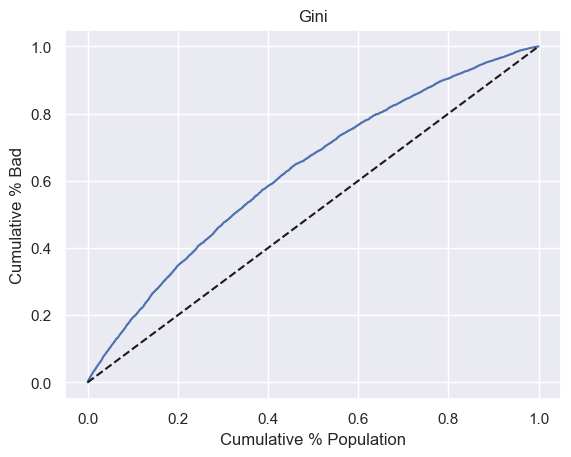

In [73]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [74]:
Gini = AUROC * 2 - 1
Gini

0.2734900654783612

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

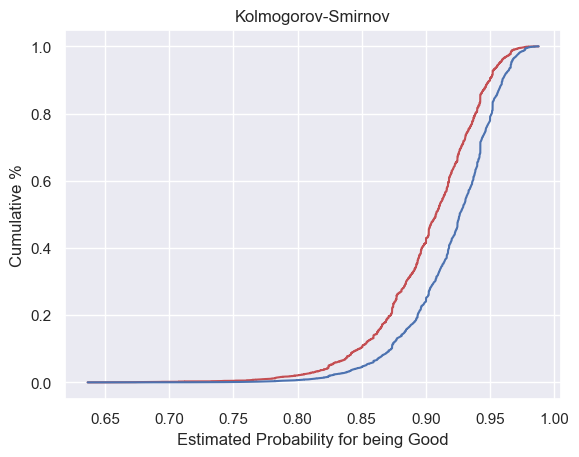

In [75]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [76]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.20479227977547665

# Applying the PD Model

### Calculating PD of individual accounts

In [77]:
pd.options.display.max_columns = None

In [78]:
inputs_test_with_ref_cat.head()

,NAME_CONTRACT_TYPE:Cash loans,NAME_CONTRACT_TYPE:Revolving loans,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Academic degree,NAME_FAMILY_STATUS:not married,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:divorced,NAME_HOUSING_TYPE:Rented apartment,NAME_HOUSING_TYPE:Municipal apartment,NAME_HOUSING_TYPE:Co-op apartment,NAME_HOUSING_TYPE:House / apartment,NAME_HOUSING_TYPE:Office apartment,OCCUPATION_TYPE:Low-skill Laborers,OCCUPATION_TYPE:Waiters/barmen staff,OCCUPATION_TYPE:Drivers,OCCUPATION_TYPE:Security_staff_Cooking_staff,OCCUPATION_TYPE:Laborers_Sales_staff,OCCUPATION_TYPE:Cleaning staff,OCCUPATION_TYPE:Realty_agents_IT_staff,OCCUPATION_TYPE:Private_service_staff_Medicine_staff,OCCUPATION_TYPE:Other Occupation Type,OCCUPATION_TYPE:Secretaries,OCCUPATION_TYPE:Core_staff_Managers,OCCUPATION_TYPE:High skill tech staff,OCCUPATION_TYPE:HR staff,OCCUPATION_TYPE:Accountants,REGION_RATING_CLIENT:3,REGION_RATING_CLIENT:2,REGION_RATING_CLIENT:1,DEF_30_CNT_SOCIAL_CIRCLE:3.0,DEF_30_CNT_SOCIAL_CIRCLE:4.0,DEF_30_CNT_SOCIAL_CIRCLE:5.0,DEF_30_CNT_SOCIAL_CIRCLE:2.0,DEF_30_CNT_SOCIAL_CIRCLE:1.0,DEF_30_CNT_SOCIAL_CIRCLE:0.0,HOUSETYPE_MODE:specific housing,HOUSETYPE_MODE:terraced house,HOUSETYPE_MODE:block of flats,CODE_GENDER:M,CODE_GENDER:F,ORGANIZATION_TYPE:Transport type 3,ORGANIZATION_TYPE:Restaurant,ORGANIZATION_TYPE:Industry type 1,ORGANIZATION_TYPE:Construction,ORGANIZATION_TYPE:Realtor_Cleaning_Mobile_Industry_type 4,ORGANIZATION_TYPE:Industry_type 3_Agriculture,ORGANIZATION_TYPE:Self-employed,ORGANIZATION_TYPE:Trade type 3,ORGANIZATION_TYPE:Trade type 1,ORGANIZATION_TYPE:Security_Trade_type_7_Transport_type_4,ORGANIZATION_TYPE:Business Entity Type 3,ORGANIZATION_TYPE:Postal,ORGANIZATION_TYPE:Industry type 11,ORGANIZATION_TYPE:Business Entity Type 2,ORGANIZATION_TYPE:Advertising,ORGANIZATION_TYPE:Business Entity Type 1,ORGANIZATION_TYPE:Industry type 2,ORGANIZATION_TYPE:Industry type 7,ORGANIZATION_TYPE:Housing,ORGANIZATION_TYPE:Transport type 2,ORGANIZATION_TYPE:Telecom
245895,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
98194,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
36463,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
249923,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
158389,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [79]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.381115,NaN
1,NAME_CONTRACT_TYPE:Cash loans,-0.435663,8.625615e-49
2,NAME_EDUCATION_TYPE:Secondary / secondary special,0.184132,1.019639e-03
3,NAME_EDUCATION_TYPE:Incomplete higher,0.215870,1.626171e-03
4,NAME_EDUCATION_TYPE:Higher education,0.557909,3.152009e-21
5,NAME_EDUCATION_TYPE:Academic degree,1.127356,2.539165e-02
6,NAME_FAMILY_STATUS:not married,-0.219179,1.237997e-13
7,NAME_FAMILY_STATUS:Married,0.043738,8.121773e-02
8,NAME_HOUSING_TYPE:Municipal apartment,0.130172,3.558623e-02
9,NAME_HOUSING_TYPE:Co-op apartment,0.206155,1.167601e-01


In [80]:
y_hat_test_proba

array([0.87365069, 0.91269295, 0.90011744, ..., 0.93702448, 0.87454108,
       0.92465623])

### Creating a Scorecard

In [81]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.381115,NaN
1,NAME_CONTRACT_TYPE:Cash loans,-0.435663,8.625615e-49
2,NAME_EDUCATION_TYPE:Secondary / secondary special,0.184132,1.019639e-03
3,NAME_EDUCATION_TYPE:Incomplete higher,0.215870,1.626171e-03
4,NAME_EDUCATION_TYPE:Higher education,0.557909,3.152009e-21
5,NAME_EDUCATION_TYPE:Academic degree,1.127356,2.539165e-02
6,NAME_FAMILY_STATUS:not married,-0.219179,1.237997e-13
7,NAME_FAMILY_STATUS:Married,0.043738,8.121773e-02
8,NAME_HOUSING_TYPE:Municipal apartment,0.130172,3.558623e-02
9,NAME_HOUSING_TYPE:Co-op apartment,0.206155,1.167601e-01


In [82]:
ref_categories

['NAME_CONTRACT_TYPE:Revolving loans',
 'NAME_EDUCATION_TYPE:Lower secondary',
 'NAME_FAMILY_STATUS:divorced',
 'NAME_HOUSING_TYPE:Rented apartment',
 'OCCUPATION_TYPE:Private_service_staff_Medicine_staff',
 'REGION_RATING_CLIENT:3',
 'DEF_30_CNT_SOCIAL_CIRCLE:3.0',
 'HOUSETYPE_MODE:terraced house',
 'CODE_GENDER:M',
 'ORGANIZATION_TYPE:Transport type 3']

In [83]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,NAME_CONTRACT_TYPE:Revolving loans,0,NaN
1,NAME_EDUCATION_TYPE:Lower secondary,0,NaN
2,NAME_FAMILY_STATUS:divorced,0,NaN
3,NAME_HOUSING_TYPE:Rented apartment,0,NaN
4,OCCUPATION_TYPE:Private_service_staff_Medicine...,0,NaN
5,REGION_RATING_CLIENT:3,0,NaN
6,DEF_30_CNT_SOCIAL_CIRCLE:3.0,0,NaN
7,HOUSETYPE_MODE:terraced house,0,NaN
8,CODE_GENDER:M,0,NaN
9,ORGANIZATION_TYPE:Transport type 3,0,NaN


In [84]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,1.381115,NaN
1,1,NAME_CONTRACT_TYPE:Cash loans,-0.435663,8.625615e-49
2,2,NAME_EDUCATION_TYPE:Secondary / secondary special,0.184132,1.019639e-03
3,3,NAME_EDUCATION_TYPE:Incomplete higher,0.215870,1.626171e-03
4,4,NAME_EDUCATION_TYPE:Higher education,0.557909,3.152009e-21
5,5,NAME_EDUCATION_TYPE:Academic degree,1.127356,2.539165e-02
6,6,NAME_FAMILY_STATUS:not married,-0.219179,1.237997e-13
7,7,NAME_FAMILY_STATUS:Married,0.043738,8.121773e-02
8,8,NAME_HOUSING_TYPE:Municipal apartment,0.130172,3.558623e-02
9,9,NAME_HOUSING_TYPE:Co-op apartment,0.206155,1.167601e-01


In [85]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [86]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,1.381115,NaN,Intercept
1,1,NAME_CONTRACT_TYPE:Cash loans,-0.435663,8.625615e-49,NAME_CONTRACT_TYPE
2,2,NAME_EDUCATION_TYPE:Secondary / secondary special,0.184132,1.019639e-03,NAME_EDUCATION_TYPE
3,3,NAME_EDUCATION_TYPE:Incomplete higher,0.215870,1.626171e-03,NAME_EDUCATION_TYPE
4,4,NAME_EDUCATION_TYPE:Higher education,0.557909,3.152009e-21,NAME_EDUCATION_TYPE
5,5,NAME_EDUCATION_TYPE:Academic degree,1.127356,2.539165e-02,NAME_EDUCATION_TYPE
6,6,NAME_FAMILY_STATUS:not married,-0.219179,1.237997e-13,NAME_FAMILY_STATUS
7,7,NAME_FAMILY_STATUS:Married,0.043738,8.121773e-02,NAME_FAMILY_STATUS
8,8,NAME_HOUSING_TYPE:Municipal apartment,0.130172,3.558623e-02,NAME_HOUSING_TYPE
9,9,NAME_HOUSING_TYPE:Co-op apartment,0.206155,1.167601e-01,NAME_HOUSING_TYPE


In [87]:
min_score = 300
max_score = 850

In [88]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
CODE_GENDER                 0.000000
DEF_30_CNT_SOCIAL_CIRCLE    0.000000
HOUSETYPE_MODE              0.000000
Intercept                   1.381115
NAME_CONTRACT_TYPE         -0.435663
NAME_EDUCATION_TYPE         0.000000
NAME_FAMILY_STATUS         -0.219179
NAME_HOUSING_TYPE           0.000000
OCCUPATION_TYPE            -0.472354
ORGANIZATION_TYPE          -0.557248
REGION_RATING_CLIENT        0.000000
Name: Coefficients, dtype: float64

In [89]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-0.3033291493237426

In [90]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
CODE_GENDER                 0.289092
DEF_30_CNT_SOCIAL_CIRCLE    0.562023
HOUSETYPE_MODE              0.206470
Intercept                   1.381115
NAME_CONTRACT_TYPE          0.000000
NAME_EDUCATION_TYPE         1.127356
NAME_FAMILY_STATUS          0.043738
NAME_HOUSING_TYPE           0.429080
OCCUPATION_TYPE             0.308777
ORGANIZATION_TYPE           0.000000
REGION_RATING_CLIENT        0.794113
Name: Coefficients, dtype: float64

In [91]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.141763823239962

In [92]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,1.381115,NaN,Intercept,139.504144
1,1,NAME_CONTRACT_TYPE:Cash loans,-0.435663,8.625615e-49,NAME_CONTRACT_TYPE,-44.005641
2,2,NAME_EDUCATION_TYPE:Secondary / secondary special,0.184132,1.019639e-03,NAME_EDUCATION_TYPE,18.598917
3,3,NAME_EDUCATION_TYPE:Incomplete higher,0.215870,1.626171e-03,NAME_EDUCATION_TYPE,21.804667
4,4,NAME_EDUCATION_TYPE:Higher education,0.557909,3.152009e-21,NAME_EDUCATION_TYPE,56.353466
5,5,NAME_EDUCATION_TYPE:Academic degree,1.127356,2.539165e-02,NAME_EDUCATION_TYPE,113.872363
6,6,NAME_FAMILY_STATUS:not married,-0.219179,1.237997e-13,NAME_FAMILY_STATUS,-22.138896
7,7,NAME_FAMILY_STATUS:Married,0.043738,8.121773e-02,NAME_FAMILY_STATUS,4.417950
8,8,NAME_HOUSING_TYPE:Municipal apartment,0.130172,3.558623e-02,NAME_HOUSING_TYPE,13.148439
9,9,NAME_HOUSING_TYPE:Co-op apartment,0.206155,1.167601e-01,NAME_HOUSING_TYPE,20.823416


In [93]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\Azam Fathurrahman\AppData\Local\Temp\ipykernel_9564\1263832758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,1.381115,NaN,Intercept,470.142929
1,1,NAME_CONTRACT_TYPE:Cash loans,-0.435663,8.625615e-49,NAME_CONTRACT_TYPE,-44.005641
2,2,NAME_EDUCATION_TYPE:Secondary / secondary special,0.184132,1.019639e-03,NAME_EDUCATION_TYPE,18.598917
3,3,NAME_EDUCATION_TYPE:Incomplete higher,0.215870,1.626171e-03,NAME_EDUCATION_TYPE,21.804667
4,4,NAME_EDUCATION_TYPE:Higher education,0.557909,3.152009e-21,NAME_EDUCATION_TYPE,56.353466
5,5,NAME_EDUCATION_TYPE:Academic degree,1.127356,2.539165e-02,NAME_EDUCATION_TYPE,113.872363
6,6,NAME_FAMILY_STATUS:not married,-0.219179,1.237997e-13,NAME_FAMILY_STATUS,-22.138896
7,7,NAME_FAMILY_STATUS:Married,0.043738,8.121773e-02,NAME_FAMILY_STATUS,4.417950
8,8,NAME_HOUSING_TYPE:Municipal apartment,0.130172,3.558623e-02,NAME_HOUSING_TYPE,13.148439
9,9,NAME_HOUSING_TYPE:Co-op apartment,0.206155,1.167601e-01,NAME_HOUSING_TYPE,20.823416


In [94]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,1.381115,NaN,Intercept,470.142929,470.0
1,1,NAME_CONTRACT_TYPE:Cash loans,-0.435663,8.625615e-49,NAME_CONTRACT_TYPE,-44.005641,-44.0
2,2,NAME_EDUCATION_TYPE:Secondary / secondary special,0.184132,1.019639e-03,NAME_EDUCATION_TYPE,18.598917,19.0
3,3,NAME_EDUCATION_TYPE:Incomplete higher,0.215870,1.626171e-03,NAME_EDUCATION_TYPE,21.804667,22.0
4,4,NAME_EDUCATION_TYPE:Higher education,0.557909,3.152009e-21,NAME_EDUCATION_TYPE,56.353466,56.0
5,5,NAME_EDUCATION_TYPE:Academic degree,1.127356,2.539165e-02,NAME_EDUCATION_TYPE,113.872363,114.0
6,6,NAME_FAMILY_STATUS:not married,-0.219179,1.237997e-13,NAME_FAMILY_STATUS,-22.138896,-22.0
7,7,NAME_FAMILY_STATUS:Married,0.043738,8.121773e-02,NAME_FAMILY_STATUS,4.417950,4.0
8,8,NAME_HOUSING_TYPE:Municipal apartment,0.130172,3.558623e-02,NAME_HOUSING_TYPE,13.148439,13.0
9,9,NAME_HOUSING_TYPE:Co-op apartment,0.206155,1.167601e-01,NAME_HOUSING_TYPE,20.823416,21.0


In [95]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [96]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

849.0

In [97]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,1.381115,NaN,Intercept,470.142929,470.0,-0.142929
1,1,NAME_CONTRACT_TYPE:Cash loans,-0.435663,8.625615e-49,NAME_CONTRACT_TYPE,-44.005641,-44.0,0.005641
2,2,NAME_EDUCATION_TYPE:Secondary / secondary special,0.184132,1.019639e-03,NAME_EDUCATION_TYPE,18.598917,19.0,0.401083
3,3,NAME_EDUCATION_TYPE:Incomplete higher,0.215870,1.626171e-03,NAME_EDUCATION_TYPE,21.804667,22.0,0.195333
4,4,NAME_EDUCATION_TYPE:Higher education,0.557909,3.152009e-21,NAME_EDUCATION_TYPE,56.353466,56.0,-0.353466
5,5,NAME_EDUCATION_TYPE:Academic degree,1.127356,2.539165e-02,NAME_EDUCATION_TYPE,113.872363,114.0,0.127637
6,6,NAME_FAMILY_STATUS:not married,-0.219179,1.237997e-13,NAME_FAMILY_STATUS,-22.138896,-22.0,0.138896
7,7,NAME_FAMILY_STATUS:Married,0.043738,8.121773e-02,NAME_FAMILY_STATUS,4.417950,4.0,-0.417950
8,8,NAME_HOUSING_TYPE:Municipal apartment,0.130172,3.558623e-02,NAME_HOUSING_TYPE,13.148439,13.0,-0.148439
9,9,NAME_HOUSING_TYPE:Co-op apartment,0.206155,1.167601e-01,NAME_HOUSING_TYPE,20.823416,21.0,0.176584


In [98]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][2] = 19
df_scorecard

C:\Users\Azam Fathurrahman\AppData\Local\Temp\ipykernel_9564\584644685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][2] = 19


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,1.381115,NaN,Intercept,470.142929,470.0,-0.142929,470.0
1,1,NAME_CONTRACT_TYPE:Cash loans,-0.435663,8.625615e-49,NAME_CONTRACT_TYPE,-44.005641,-44.0,0.005641,-44.0
2,2,NAME_EDUCATION_TYPE:Secondary / secondary special,0.184132,1.019639e-03,NAME_EDUCATION_TYPE,18.598917,19.0,0.401083,19.0
3,3,NAME_EDUCATION_TYPE:Incomplete higher,0.215870,1.626171e-03,NAME_EDUCATION_TYPE,21.804667,22.0,0.195333,22.0
4,4,NAME_EDUCATION_TYPE:Higher education,0.557909,3.152009e-21,NAME_EDUCATION_TYPE,56.353466,56.0,-0.353466,56.0
5,5,NAME_EDUCATION_TYPE:Academic degree,1.127356,2.539165e-02,NAME_EDUCATION_TYPE,113.872363,114.0,0.127637,114.0
6,6,NAME_FAMILY_STATUS:not married,-0.219179,1.237997e-13,NAME_FAMILY_STATUS,-22.138896,-22.0,0.138896,-22.0
7,7,NAME_FAMILY_STATUS:Married,0.043738,8.121773e-02,NAME_FAMILY_STATUS,4.417950,4.0,-0.417950,4.0
8,8,NAME_HOUSING_TYPE:Municipal apartment,0.130172,3.558623e-02,NAME_HOUSING_TYPE,13.148439,13.0,-0.148439,13.0
9,9,NAME_HOUSING_TYPE:Co-op apartment,0.206155,1.167601e-01,NAME_HOUSING_TYPE,20.823416,21.0,0.176584,21.0


In [99]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [100]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

849.0

### Caclulating Credit Score

In [101]:
inputs_test_with_ref_cat.head()

,NAME_CONTRACT_TYPE:Cash loans,NAME_CONTRACT_TYPE:Revolving loans,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Academic degree,NAME_FAMILY_STATUS:not married,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:divorced,NAME_HOUSING_TYPE:Rented apartment,NAME_HOUSING_TYPE:Municipal apartment,NAME_HOUSING_TYPE:Co-op apartment,NAME_HOUSING_TYPE:House / apartment,NAME_HOUSING_TYPE:Office apartment,OCCUPATION_TYPE:Low-skill Laborers,OCCUPATION_TYPE:Waiters/barmen staff,OCCUPATION_TYPE:Drivers,OCCUPATION_TYPE:Security_staff_Cooking_staff,OCCUPATION_TYPE:Laborers_Sales_staff,OCCUPATION_TYPE:Cleaning staff,OCCUPATION_TYPE:Realty_agents_IT_staff,OCCUPATION_TYPE:Private_service_staff_Medicine_staff,OCCUPATION_TYPE:Other Occupation Type,OCCUPATION_TYPE:Secretaries,OCCUPATION_TYPE:Core_staff_Managers,OCCUPATION_TYPE:High skill tech staff,OCCUPATION_TYPE:HR staff,OCCUPATION_TYPE:Accountants,REGION_RATING_CLIENT:3,REGION_RATING_CLIENT:2,REGION_RATING_CLIENT:1,DEF_30_CNT_SOCIAL_CIRCLE:3.0,DEF_30_CNT_SOCIAL_CIRCLE:4.0,DEF_30_CNT_SOCIAL_CIRCLE:5.0,DEF_30_CNT_SOCIAL_CIRCLE:2.0,DEF_30_CNT_SOCIAL_CIRCLE:1.0,DEF_30_CNT_SOCIAL_CIRCLE:0.0,HOUSETYPE_MODE:specific housing,HOUSETYPE_MODE:terraced house,HOUSETYPE_MODE:block of flats,CODE_GENDER:M,CODE_GENDER:F,ORGANIZATION_TYPE:Transport type 3,ORGANIZATION_TYPE:Restaurant,ORGANIZATION_TYPE:Industry type 1,ORGANIZATION_TYPE:Construction,ORGANIZATION_TYPE:Realtor_Cleaning_Mobile_Industry_type 4,ORGANIZATION_TYPE:Industry_type 3_Agriculture,ORGANIZATION_TYPE:Self-employed,ORGANIZATION_TYPE:Trade type 3,ORGANIZATION_TYPE:Trade type 1,ORGANIZATION_TYPE:Security_Trade_type_7_Transport_type_4,ORGANIZATION_TYPE:Business Entity Type 3,ORGANIZATION_TYPE:Postal,ORGANIZATION_TYPE:Industry type 11,ORGANIZATION_TYPE:Business Entity Type 2,ORGANIZATION_TYPE:Advertising,ORGANIZATION_TYPE:Business Entity Type 1,ORGANIZATION_TYPE:Industry type 2,ORGANIZATION_TYPE:Industry type 7,ORGANIZATION_TYPE:Housing,ORGANIZATION_TYPE:Transport type 2,ORGANIZATION_TYPE:Telecom
245895,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
98194,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
36463,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
249923,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
158389,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [102]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,1.381115,NaN,Intercept,470.142929,470.0,-0.142929,470.0
1,1,NAME_CONTRACT_TYPE:Cash loans,-0.435663,8.625615e-49,NAME_CONTRACT_TYPE,-44.005641,-44.0,0.005641,-44.0
2,2,NAME_EDUCATION_TYPE:Secondary / secondary special,0.184132,1.019639e-03,NAME_EDUCATION_TYPE,18.598917,19.0,0.401083,19.0
3,3,NAME_EDUCATION_TYPE:Incomplete higher,0.215870,1.626171e-03,NAME_EDUCATION_TYPE,21.804667,22.0,0.195333,22.0
4,4,NAME_EDUCATION_TYPE:Higher education,0.557909,3.152009e-21,NAME_EDUCATION_TYPE,56.353466,56.0,-0.353466,56.0
5,5,NAME_EDUCATION_TYPE:Academic degree,1.127356,2.539165e-02,NAME_EDUCATION_TYPE,113.872363,114.0,0.127637,114.0
6,6,NAME_FAMILY_STATUS:not married,-0.219179,1.237997e-13,NAME_FAMILY_STATUS,-22.138896,-22.0,0.138896,-22.0
7,7,NAME_FAMILY_STATUS:Married,0.043738,8.121773e-02,NAME_FAMILY_STATUS,4.417950,4.0,-0.417950,4.0
8,8,NAME_HOUSING_TYPE:Municipal apartment,0.130172,3.558623e-02,NAME_HOUSING_TYPE,13.148439,13.0,-0.148439,13.0
9,9,NAME_HOUSING_TYPE:Co-op apartment,0.206155,1.167601e-01,NAME_HOUSING_TYPE,20.823416,21.0,0.176584,21.0


In [103]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [104]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [105]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,NAME_CONTRACT_TYPE:Cash loans,NAME_CONTRACT_TYPE:Revolving loans,NAME_EDUCATION_TYPE:Lower secondary,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Academic degree,NAME_FAMILY_STATUS:not married,NAME_FAMILY_STATUS:Married,NAME_FAMILY_STATUS:divorced,NAME_HOUSING_TYPE:Rented apartment,NAME_HOUSING_TYPE:Municipal apartment,NAME_HOUSING_TYPE:Co-op apartment,NAME_HOUSING_TYPE:House / apartment,NAME_HOUSING_TYPE:Office apartment,OCCUPATION_TYPE:Low-skill Laborers,OCCUPATION_TYPE:Waiters/barmen staff,OCCUPATION_TYPE:Drivers,OCCUPATION_TYPE:Security_staff_Cooking_staff,OCCUPATION_TYPE:Laborers_Sales_staff,OCCUPATION_TYPE:Cleaning staff,OCCUPATION_TYPE:Realty_agents_IT_staff,OCCUPATION_TYPE:Private_service_staff_Medicine_staff,OCCUPATION_TYPE:Other Occupation Type,OCCUPATION_TYPE:Secretaries,OCCUPATION_TYPE:Core_staff_Managers,OCCUPATION_TYPE:High skill tech staff,OCCUPATION_TYPE:HR staff,OCCUPATION_TYPE:Accountants,REGION_RATING_CLIENT:3,REGION_RATING_CLIENT:2,REGION_RATING_CLIENT:1,DEF_30_CNT_SOCIAL_CIRCLE:3.0,DEF_30_CNT_SOCIAL_CIRCLE:4.0,DEF_30_CNT_SOCIAL_CIRCLE:5.0,DEF_30_CNT_SOCIAL_CIRCLE:2.0,DEF_30_CNT_SOCIAL_CIRCLE:1.0,DEF_30_CNT_SOCIAL_CIRCLE:0.0,HOUSETYPE_MODE:specific housing,HOUSETYPE_MODE:terraced house,HOUSETYPE_MODE:block of flats,CODE_GENDER:M,CODE_GENDER:F,ORGANIZATION_TYPE:Transport type 3,ORGANIZATION_TYPE:Restaurant,ORGANIZATION_TYPE:Industry type 1,ORGANIZATION_TYPE:Construction,ORGANIZATION_TYPE:Realtor_Cleaning_Mobile_Industry_type 4,ORGANIZATION_TYPE:Industry_type 3_Agriculture,ORGANIZATION_TYPE:Self-employed,ORGANIZATION_TYPE:Trade type 3,ORGANIZATION_TYPE:Trade type 1,ORGANIZATION_TYPE:Security_Trade_type_7_Transport_type_4,ORGANIZATION_TYPE:Business Entity Type 3,ORGANIZATION_TYPE:Postal,ORGANIZATION_TYPE:Industry type 11,ORGANIZATION_TYPE:Business Entity Type 2,ORGANIZATION_TYPE:Advertising,ORGANIZATION_TYPE:Business Entity Type 1,ORGANIZATION_TYPE:Industry type 2,ORGANIZATION_TYPE:Industry type 7,ORGANIZATION_TYPE:Housing,ORGANIZATION_TYPE:Transport type 2,ORGANIZATION_TYPE:Telecom
245895,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
98194,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
36463,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
249923,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
158389,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [106]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [107]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,NAME_CONTRACT_TYPE:Cash loans,NAME_EDUCATION_TYPE:Secondary / secondary special,NAME_EDUCATION_TYPE:Incomplete higher,NAME_EDUCATION_TYPE:Higher education,NAME_EDUCATION_TYPE:Academic degree,NAME_FAMILY_STATUS:not married,NAME_FAMILY_STATUS:Married,NAME_HOUSING_TYPE:Municipal apartment,NAME_HOUSING_TYPE:Co-op apartment,NAME_HOUSING_TYPE:House / apartment,NAME_HOUSING_TYPE:Office apartment,OCCUPATION_TYPE:Low-skill Laborers,OCCUPATION_TYPE:Waiters/barmen staff,OCCUPATION_TYPE:Drivers,OCCUPATION_TYPE:Security_staff_Cooking_staff,OCCUPATION_TYPE:Laborers_Sales_staff,OCCUPATION_TYPE:Cleaning staff,OCCUPATION_TYPE:Realty_agents_IT_staff,OCCUPATION_TYPE:Other Occupation Type,OCCUPATION_TYPE:Secretaries,OCCUPATION_TYPE:Core_staff_Managers,OCCUPATION_TYPE:High skill tech staff,OCCUPATION_TYPE:HR staff,OCCUPATION_TYPE:Accountants,REGION_RATING_CLIENT:2,REGION_RATING_CLIENT:1,DEF_30_CNT_SOCIAL_CIRCLE:4.0,DEF_30_CNT_SOCIAL_CIRCLE:5.0,DEF_30_CNT_SOCIAL_CIRCLE:2.0,DEF_30_CNT_SOCIAL_CIRCLE:1.0,DEF_30_CNT_SOCIAL_CIRCLE:0.0,HOUSETYPE_MODE:specific housing,HOUSETYPE_MODE:block of flats,CODE_GENDER:F,ORGANIZATION_TYPE:Restaurant,ORGANIZATION_TYPE:Industry type 1,ORGANIZATION_TYPE:Construction,ORGANIZATION_TYPE:Realtor_Cleaning_Mobile_Industry_type 4,ORGANIZATION_TYPE:Industry_type 3_Agriculture,ORGANIZATION_TYPE:Self-employed,ORGANIZATION_TYPE:Trade type 3,ORGANIZATION_TYPE:Trade type 1,ORGANIZATION_TYPE:Security_Trade_type_7_Transport_type_4,ORGANIZATION_TYPE:Business Entity Type 3,ORGANIZATION_TYPE:Postal,ORGANIZATION_TYPE:Industry type 11,ORGANIZATION_TYPE:Business Entity Type 2,ORGANIZATION_TYPE:Advertising,ORGANIZATION_TYPE:Business Entity Type 1,ORGANIZATION_TYPE:Industry type 2,ORGANIZATION_TYPE:Industry type 7,ORGANIZATION_TYPE:Housing,ORGANIZATION_TYPE:Transport type 2,ORGANIZATION_TYPE:Telecom,NAME_CONTRACT_TYPE:Revolving loans,NAME_EDUCATION_TYPE:Lower secondary,NAME_FAMILY_STATUS:divorced,NAME_HOUSING_TYPE:Rented apartment,OCCUPATION_TYPE:Private_service_staff_Medicine_staff,REGION_RATING_CLIENT:3,DEF_30_CNT_SOCIAL_CIRCLE:3.0,HOUSETYPE_MODE:terraced house,CODE_GENDER:M,ORGANIZATION_TYPE:Transport type 3
245895,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
98194,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
36463,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
249923,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
158389,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [108]:
scorecard_scores = df_scorecard['Score - Final']

In [109]:
inputs_test_with_ref_cat_w_intercept.shape

(61503, 65)

In [110]:
scorecard_scores.shape

(65,)

In [111]:
scorecard_scores = scorecard_scores.values.reshape(65, 1)

In [112]:
scorecard_scores.shape

(65, 1)

In [113]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [114]:
y_scores.head()

,0
245895,525.0
98194,567.0
36463,552.0
249923,623.0
158389,519.0


In [115]:
y_scores.tail()

,0
256564,624.0
278889,611.0
221828,603.0
190245,526.0
253004,582.0


In [116]:
y_scores.shape

(61503, 1)

In [117]:
#Scorecard masing-masing Borrower
#y_scores